**Due: 4 PM on Wednesday, 10 Feb 2016**

Instructions
-----

Write code to solve all problems. The grading rubric includes the following criteria:

- Correctness
- Readability
- Efficiency

Please do not copy answers found on the web or elsewhere as it will not benefit your learning. Searching the web for general references etc is OK. Some discussion with friends is fine too - but again, do not just copy their answer. 

**Honor Code: By submitting this assignment, you certify that this is your original work.**

**Note**: These exercises will involve quite a bit more code writing than the first 2 homework assignments so start early. They are also intentionally less specific so that you have to come up with your own plan to complete the exercises.

We will use the following data sets:
```python
titanic = sns.load_dataset("titanic")
iris = sns.load_dataset("iris")
```

**Q1 (20 pts)** Working with `numpy.random`.

**Part 1 (10 pts)** Consider a sequence of $n$ Bernoulli trials with success probabilty $p$ per trial. A string of consecutive successes is known as a success *run*. Write a function that returns the counts for runs of length $k$ for each $k$ observed in a dictionary.

For example: if the trials were [0, 1, 0, 1, 1, 0, 0, 0, 0, 1], the function should return 
```
{1: 2, 2: 1})
```

In [395]:
import numpy as np
# Takes in a list
# Returns a dictionary
def count_run(lst):
    result = {}
    i = 0
    while i < len(lst):
        if lst[i] == 0:
            # End this round and Go to next number
            i = i + 1
            continue
        # If lst[i] == 1, store the list remain
        rest_lst = lst[i+1:]
        if rest_lst == [1] * len(rest_lst):
            # If the rest numbers are all 1, record this number and end loop
            k = len(rest_lst) + 1
            result[k] = result.get(k, 0) + 1
            break
        if rest_lst == []:
            # If this is the last number, record 1 and end loop
            result[1] = result.get(1, 0) + 1
            break
        # Else find out the next 0, record the number of 1s before it and jump to it
        j = rest_lst.index(0) + 1
        result[j] = result.get(j, 0) + 1
        # Go to next loop
        i = i + j
    return(result)

**Part 2 (10 pts)** Continuing from Part 1, what is the probability of observing at least one run of length 5 or more when $n=100$ and $p=0.5$?. Estimate this from 100,000 simulated experiments. Is this more, less or equally likely than finding runs of length 7 or more when $p=0.7$?

In [396]:
# probability of observing at least one run of length 5 or more when n=100 and p=0.5
n = 100
p = 0.5
d = 5
s1 = 0

for _ in range(100000):
    lst = np.random.binomial(1, p, n).tolist()
    dic = count_run(lst)
    if any(np.array(list(dic.keys())) >= d) == True:
        s1 += 1


# probability of observing at least one run of length 7 or more when n=100 and p=0.7
n = 100
p = 0.7
d = 7
s2 = 0

for _ in range(100000):
    lst = np.random.binomial(1, p, n).tolist()
    dic = count_run(lst)
    if any(np.array(list(dic.keys())) >= d) == True:
        s2 += 1

print("The one with p=0.5 is %f and smaller than %f with p=0.7" % (s1/100000, s2/100000))

The one with p=0.5 is 0.806690 and smaller than 0.948960 with p=0.7


**Q2. (30 pts)** 

Using `RandomForestClassifier` from `sklearn`, find the 5 most important predictors of survival on the Titanic. Compare the accuracy of prediction using only these 5 predictors and using all non-redundant predictors. Some intial pre-processing code is provided. Hint: check out the `pandas.get_dummies()` function.

In [397]:
titanic = sns.load_dataset("titanic")
titanic.drop(['alive', 'embarked', 'class', 'who', 'adult_male'], axis=1, inplace=True)
titanic.dropna(axis=0, inplace=True)
# transform the 'alone' data into categorical data
titanic['alone'] = titanic['alone'].astype('category')

In [398]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
import pandas as pd

# Get rid of 'survived' data and use get_dummies create dummy variable for categorical data
tit = pd.get_dummies(titanic.ix[:,1:])

# transform the 'survived' data into categorical data
survived = titanic.ix[:,0].astype('category')

# Use Cross-validation
X_train, X_test, y_train, y_test = \
  train_test_split(tit, survived, test_size=0.33, random_state=42)
    
# Set the parameters
parameters = [{'n_estimators': list(range(25, 201, 25)),
               'max_features': list(range(2, 15, 2))}]

# RandomForestClassifier
clf = GridSearchCV(RandomForestClassifier(), parameters, 
                   cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(X_train, y_train.codes)
pass

# Mean accuracy on the given test data
a = clf.score(X_test, y_test.codes)
a

0.62295081967213117

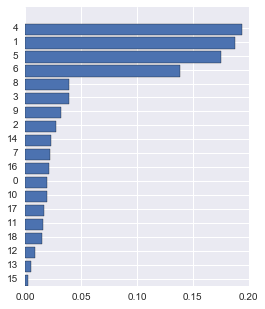

In [399]:
# Return the rank of important variables
imp = clf.best_estimator_.feature_importances_
idx = np.argsort(imp)
plt.figure(figsize=(4, 5))
plt.barh(range(len(imp)), imp[idx])
plt.yticks(np.arange(len(imp))+0.5, idx)
pass

In [400]:
# Take out the 5 most important variables
tit_5 = tit.ix[:, idx[::-1][0:5].tolist()]

# Redo the same procedure for these 5 variables
X_train, X_test, y_train, y_test = \
  train_test_split(tit_5, survived, test_size=0.33, random_state=42)
parameters = [{'n_estimators': list(range(25, 201, 25)),
               'max_features': list(range(1, 5, 1))}]
clf = GridSearchCV(RandomForestClassifier(), parameters, 
                   cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(X_train, y_train.codes)
pass

In [401]:
# Mean accuracy on the given test data
b = clf.score(X_test, y_test.codes)
print("The accuracy of prediction using only these 5 predictors is %f and %f for using all non-redundant predictor." % (b, a))

The accuracy of prediction using only these 5 predictors is 0.770492 and 0.622951 for using all non-redundant predictor.


**Q2. (25 pts)**

Using `sklearn`, perform unsupervised learning of the iris data using 2 different clustering methods. Do NOT assume you know the number of clusters - rather the code should either determine it from the data or compare models with different numbers of components using some appropriate test statistic. Make a pairwise scatter  plot of the four predictor variables indicating cluster by color for each unsupervised learning method used.

2 0.681046169212
3 0.552819012356
4 0.498050504997
5 0.488748887093
6 0.364834003967


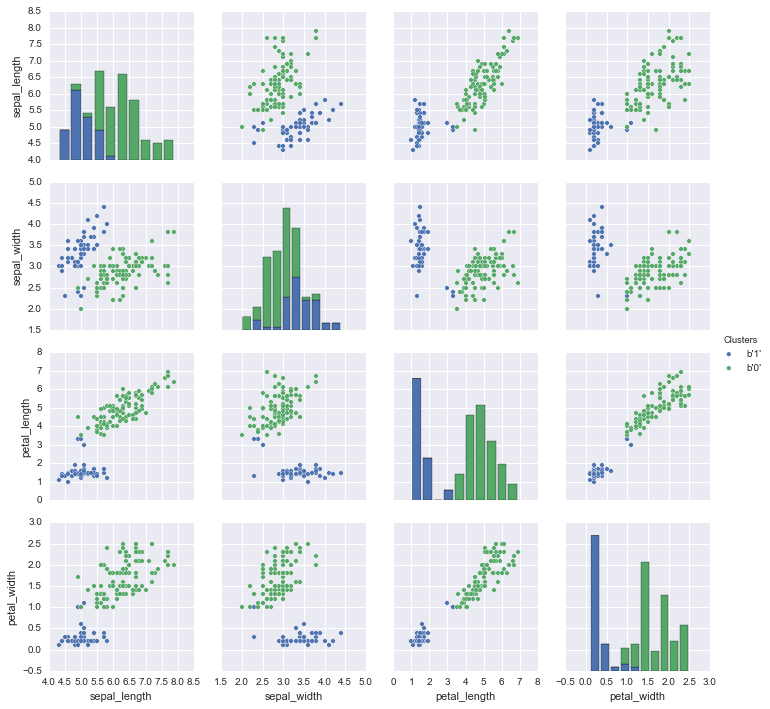

In [402]:
# Selecting the number of clusters with silhouette analysis on KMeans clustering
sns.set_context("notebook", font_scale=1)
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
iris = sns.load_dataset("iris")
X = iris.ix[:, :-1]
range_n_clusters = [2, 3, 4, 5, 6]

# Calculate the silhouette average score
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(n_clusters,silhouette_avg)
    

# We select the one with the biggest silhouette average score, which is 2
clusterer = KMeans(n_clusters=2, random_state=42)
cluster_labels = clusterer.fit_predict(X)
X.loc[:,'Clusters'] = np.loadtxt(cluster_labels,dtype='str')
sns.pairplot(X,hue='Clusters') 
pass

2 574.420610355


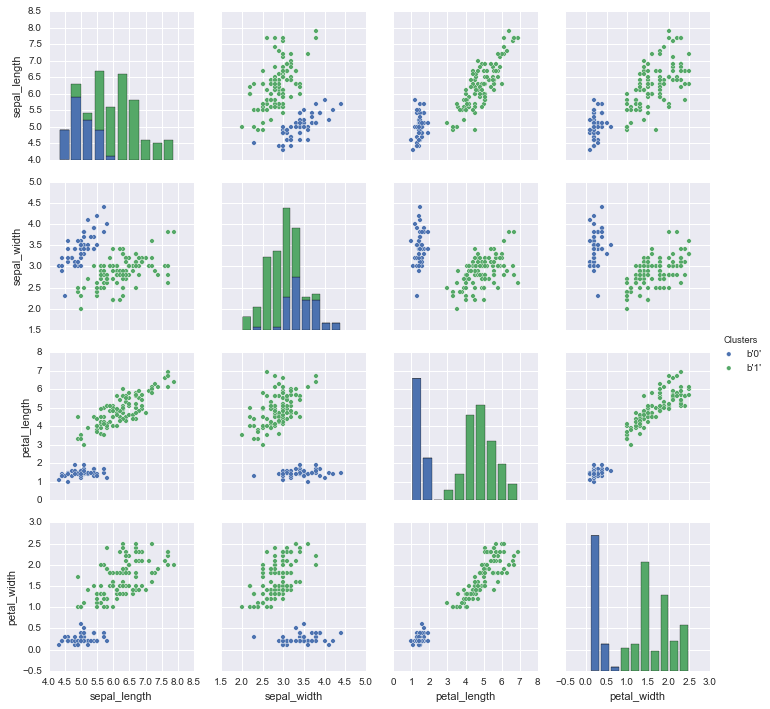

In [403]:
# Gaussian Mixture Model Selection
import itertools
import numpy as np
from scipy import linalg
from sklearn import mixture
iris = sns.load_dataset("iris")
X = iris.ix[:, :-1]
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']

# Self-determine the best number of clusters
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GMM(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
bic = np.array(bic)
clf = best_gmm
print(clf.n_components, lowest_bic)

cluster_labels = clf.fit_predict(X)
X.loc[:,'Clusters'] = np.loadtxt(cluster_labels,dtype='str')
plot=sns.pairplot(X,hue='Clusters')

**Q3. (50 pts)**

Write code to generate a plot similar to the following ![figure](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif) using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

To make it simpler, I have provided the code for plotting below. All you need to do is to supply the `make_ca` function (which may of course use as many ohter custom functons as you deem necessary). As you can see from the code below, the `make_ca` function takes 3 arguments
```
rule - an integer e.g. 30
init - an initial state i.e. the first row of the image
niter - the number of iterations i.e. the number of rows in the image
```

In [404]:
import numpy as np
def make_ca (rule, init, niter):
    # Transform the rule into binary string
    b = "{0:b}".format(rule)
    if len(b) < 8:
        b = str(b).zfill(8)
    # Initialize
    grid = np.zeros((niter,len(init)))
    # Set the first row
    grid[0,:] = init
    for i in range(0, niter-1):
        for j in range(len(init)-2):
            x = grid[i,j:(j+3)]
            # transfrom the three neighbouring values back to number and determine the fourth(below) value
            if int(b[7-int(x[0]*4+x[1]*2+x[2])]) != 0:
                grid[(i+1),(j+1)] = 1
    return grid

In [405]:
from matplotlib.ticker import NullFormatter, IndexLocator

def plot_grid(rule, grid, ax=None):
    if ax is None:
        ax = plt.subplot(111)
    ax.grid(True, which='major', color='grey', linewidth=0.5)
    ax.imshow(grid, interpolation='none', cmap='Greys', aspect=1, alpha=0.8)
    ax.xaxis.set_major_locator(IndexLocator(1, 0))
    ax.yaxis.set_major_locator(IndexLocator(1, 0))
    ax.xaxis.set_major_formatter( NullFormatter() )
    ax.yaxis.set_major_formatter( NullFormatter() )
    ax.set_title('Rule %d' % rule)

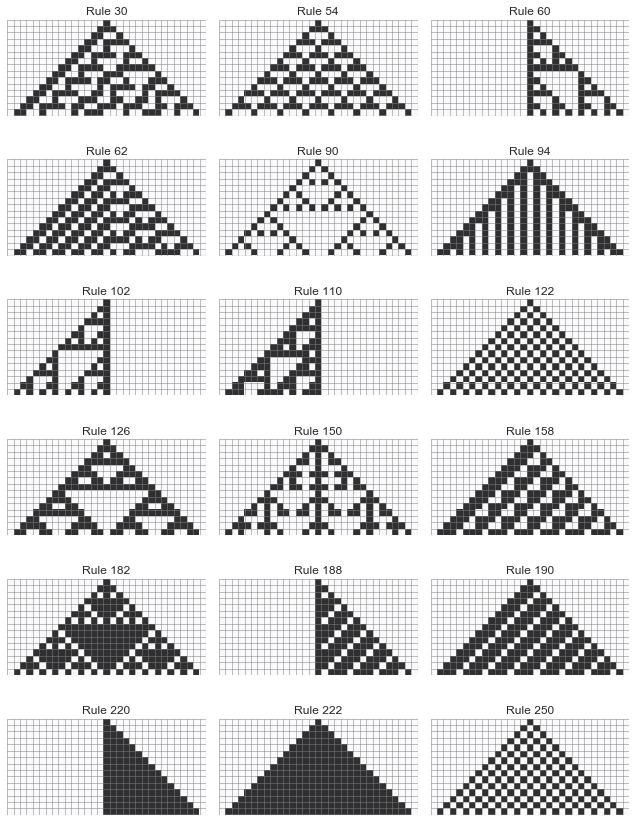

In [406]:
niter = 15
width = niter*2+1
init = np.zeros(width, 'int')
init[width//2] = 1
rules = np.array([30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
                  150, 158, 182, 188, 190, 220, 222, 250]).reshape((-1, 3))

nrows, ncols = rules.shape
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*2))
for i in range(nrows):
    for j in range(ncols):
        grid = make_ca(rules[i, j], init, niter)
        plot_grid(rules[i, j], grid, ax=axes[i,j])
plt.tight_layout()